fs = 1000

f_1 = 4 Hz

f_2 = 4.5 Hz

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from scipy import signal
import scipy.integrate as integrate

def createSubplot(n):
    fig,ax = plt.subplots(n,figsize=(10,10))
    fig.tight_layout(pad=3.0)
    return fig,ax

def calFFT(signal,fs):
    number_sample = signal.shape[0]
    realRange = fs//2

    mag = np.abs(fft(signal))
    mag_norm = mag / (number_sample/2)
    mag_range = mag_norm[:number_sample//2]

    f_range = np.linspace(0,realRange,number_sample//2)
    
    return mag_range, f_range
    

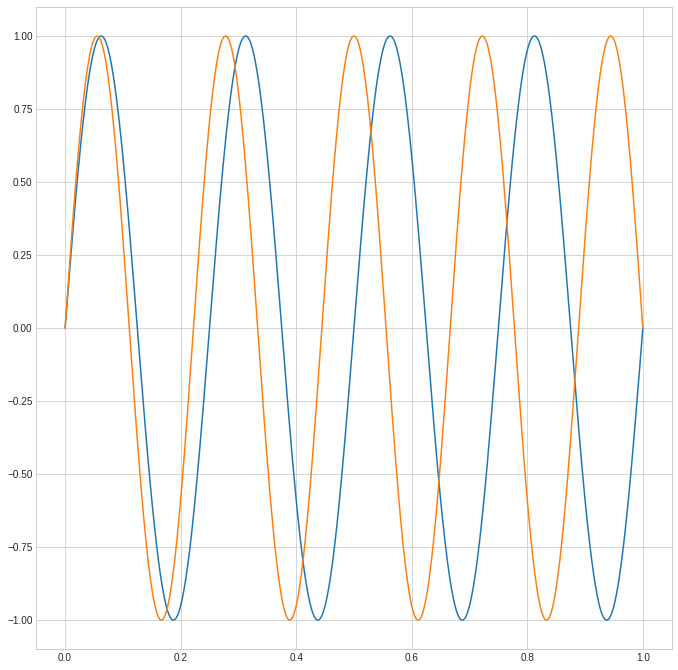

In [2]:
from numpy.fft import fft

fs = 1000
t = np.linspace(0,1,fs)
f_1 = 4
f_2 = 4.5
s_1 = np.sin(2*np.pi*f_1*t)
s_2 = np.sin(2*np.pi*f_2*t)
fig, ax = createSubplot(1)
ax.plot(t,s_1)
ax.plot(t,s_2)

Text(0.5, 1.0, 'Frequncy Spectrum Sin(9πt)')

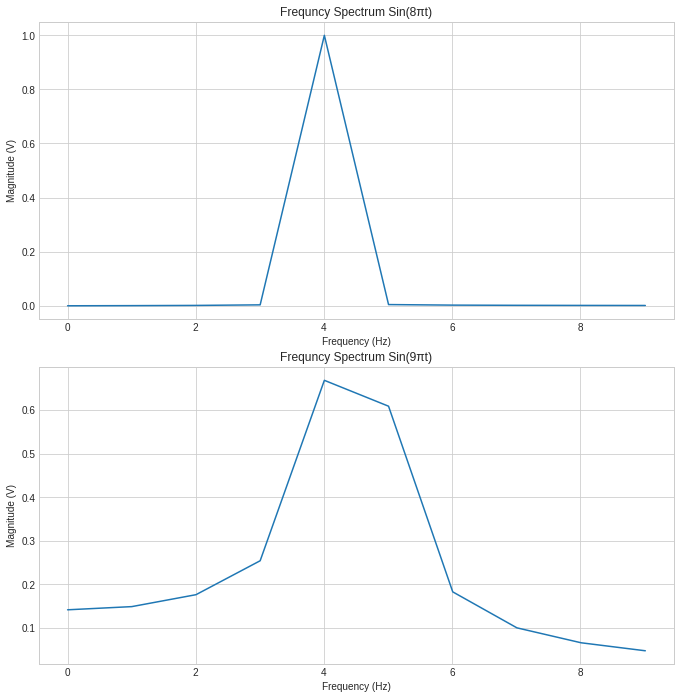

In [3]:
fig,ax = createSubplot(2)
m1,f1 = calFFT(s_1,fs)
ax[0].plot(f1[:10],m1[:10])
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title('Frequncy Spectrum Sin(8πt)')

m2,f2 = calFFT(s_2,fs)
ax[1].plot(f2[:10],m2[:10])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title('Frequncy Spectrum Sin(9πt)')

Text(0.5, 1.0, 'Frequncy Spectrum Sin(9πt) + zero padding')

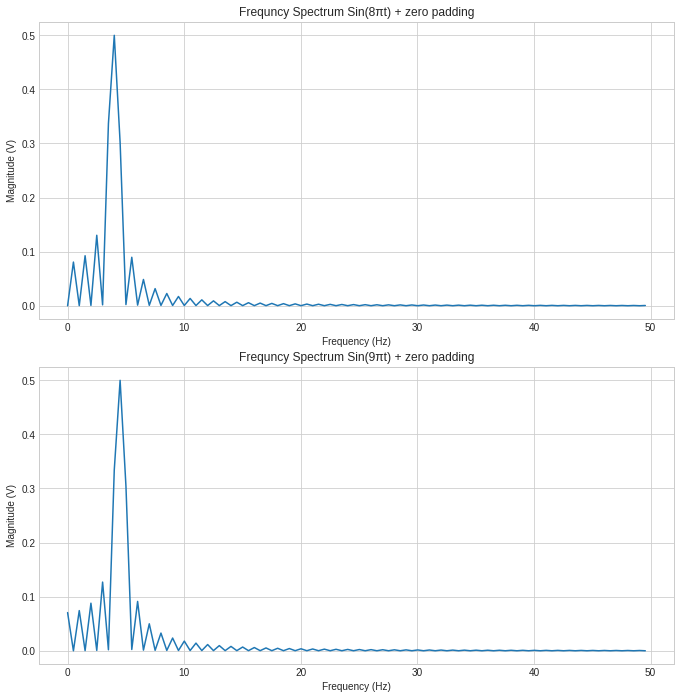

In [4]:
# Zero padding
s_1_padded = np.concatenate([s_1,np.zeros(1000)])
# print(s_1_padded.shape)
s_2_padded = np.concatenate([s_2,np.zeros(1000)])
# print(s_2_padded.shape)


fig,ax = createSubplot(2)

m1,f1 = calFFT(s_1_padded,fs)
ax[0].plot(f1[:100],m1[:100])
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title('Frequncy Spectrum Sin(8πt) + zero padding')


m2,f2 = calFFT(s_2_padded,fs)
ax[1].plot(f2[:100],m2[:100])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title('Frequncy Spectrum Sin(9πt) + zero padding')

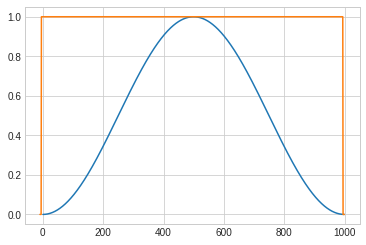

In [5]:
# hanning Window
size = s_1.shape[0]
hann = signal.hann(size)
plt.plot(np.arange(size),hann)
# Rectangular Window
rect = signal.boxcar(size)
plt.plot(np.arange(-10,size),np.concatenate([np.zeros(5),rect,np.zeros(5)] ))

Window choose be applied before the padding
- Multiply in time domain = convolute in freq domain

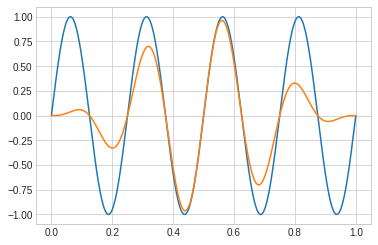

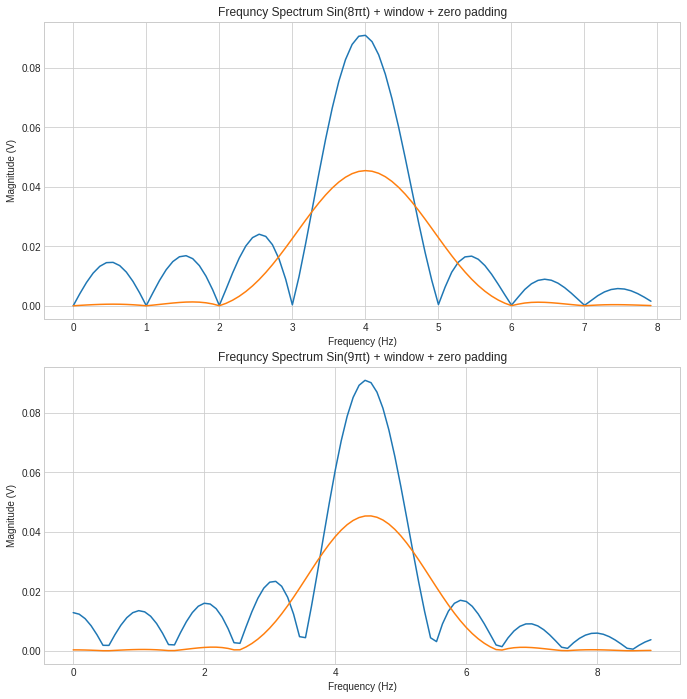

In [6]:
# apply Retangular window
def applyWindow(s,windowType):
    size = s.shape[0]
    window = None
    if(windowType == 'rectangular'):
        window = signal.boxcar(size)
    elif(windowType == 'hanning'):
        window = signal.hann(size)
    
    return s * window


s_1_r = applyWindow(s_1,'rectangular')
s_1_h = applyWindow(s_1,'hanning')
plt.plot(t,s_1_r)
plt.plot(t,s_1_h)
plt.show()
fig,ax = createSubplot(2)

s_1_r_pad = np.concatenate([s_1_r,np.zeros(10000)])
s_1_h_pad = np.concatenate([s_1_h,np.zeros(10000)])

m1,f1 = calFFT(s_1_r_pad,fs)
h = np.argmax(m1)
ax[0].plot(f1[:2*h],m1[:2*h])
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title('Frequncy Spectrum Sin(8πt) + window + zero padding')
m2,f2 = calFFT(s_1_h_pad,fs)
ax[0].plot(f2[:2*h],m2[:2*h])

s_2_r = applyWindow(s_2,'rectangular')
s_2_h = applyWindow(s_2,'hanning')

s_2_r_pad = np.concatenate([s_2_r,np.zeros(10000)])
s_2_h_pad = np.concatenate([s_2_h,np.zeros(10000)])

m1,f1 = calFFT(s_2_r_pad,fs)
h = np.argmax(m1)
ax[1].plot(f1[:2*h],m1[:2*h])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title('Frequncy Spectrum Sin(9πt) + window + zero padding')
m2,f2 = calFFT(s_2_h_pad,fs)
ax[1].plot(f2[:2*h],m2[:2*h])

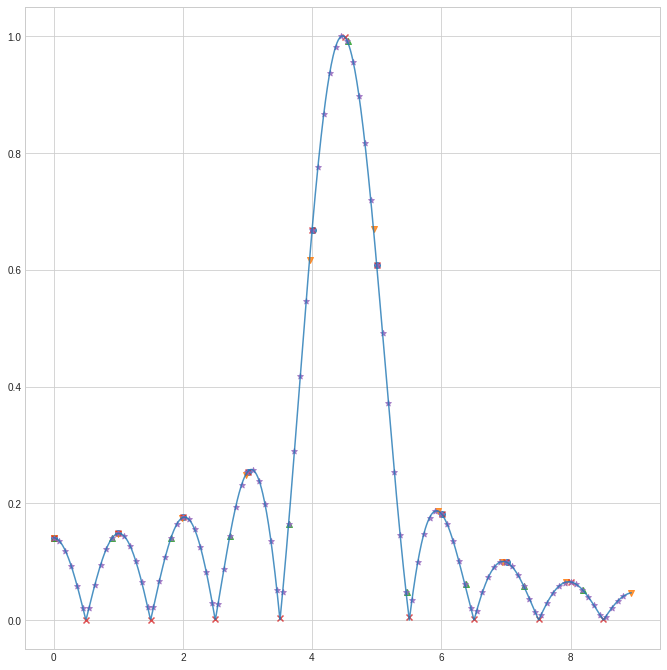

In [42]:
# Verify that less number of padding is a subset of bigger number of padding
# Let's use rectangular window with 4.5Hz of sin wave
fs = 1000
size = s_2.shape[0]
s_2_r = applyWindow(s_2,'rectangular')
pads = [0,1e+1,1e+2,1e+3,1e+4]
styles = ['o','v','^','x','*']
fig, ax = createSubplot(1)
for i,(pad_size,style) in enumerate(zip(pads,styles)):
    s_2_r_pad = np.concatenate([s_2_r,np.zeros(int(pad_size))])
    m,f = calFFT(s_2_r_pad,fs)
    m = m * ((size + pad_size) / size)
    h = np.argmax(m)
    ax.scatter(f[:2*h],m[:2*h],marker=style,alpha=0.8)
    # plt.scatter(f[:2*h],m[:2*h])
s_2_r_pad = np.concatenate([s_2_r,np.zeros(int(1e+5))])
m,f = calFFT(s_2_r_pad,fs)
m = m * ((size + 1e+5) / size)
h = np.argmax(m)
ax.plot(f[:2*h],m[:2*h],alpha=0.8)


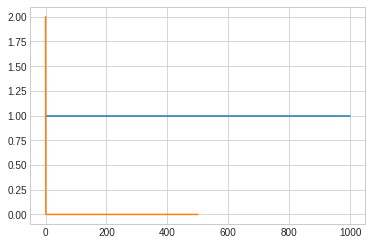

In [7]:
# plot time and freq graph of
# sin of 4Hz
# sin of 4Hz zero padded
# rect

In [ ]:
# Comutative
# Associative
# Distrivutive
# Modulation
# Scaling
# time shifting
# duality